In [11]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 22})

In [12]:
import matplotlib.pyplot as plt

In [19]:
import elasticsearch
from elasticsearch import Elasticsearch, helpers

#Get host
host = 'atlas-kibana.mwt2.org'
es = Elasticsearch([{'host': host,
                     'port': 9200}])
es.ping()

True

In [20]:

src = 'CERN-PROD*'
dst = 'BNL-OSG*'

In [21]:
body_epochs="""{
  "query": {
    "filtered": {
      "query": {
        "query_string": {
          "query": "event_type:transfer-done AND payload.src-rse:%s AND payload.dst-rse:%s",
          "analyze_wildcard": true,
          "lowercase_expanded_terms": false}},
      "filter": {
        "bool": {
          "must": [{
              "range": {
                "@timestamp": {
                  "gte": "now - 4h"}}}]}}}},
  "_source": [
    "payload.file-size",
    "payload.transferred_at",
    "payload.duration"
  ],
  "fields": [
    "_source"
  ]}"""


In [22]:
data = []
scanner = helpers.scan(client=es, query=body_epochs%(src, dst), scroll='1m',
                       index="rucio-events*", timeout="1m")

for hit in scanner:
    data.append((hit['_source']['payload']['file-size']/1000))

ConnectionTimeout: ConnectionTimeout caused by - ReadTimeoutError(HTTPConnectionPool(host='atlas-kibana.mwt2.org', port=9200): Read timed out. (read timeout=10))

In [17]:
len(data)

0

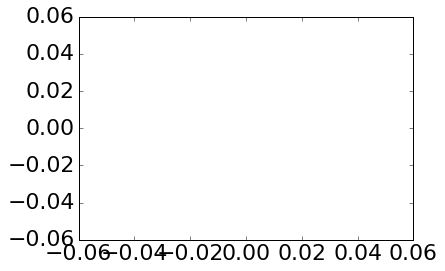

In [18]:
plt.plot(data)